In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [187]:
primary_df = pd.read_csv('Data\Avaluaci__de_sis__d_educaci__prim_ria.csv')
secondary_df = pd.read_csv('Data\Avaluaci__de_quart_d_Educaci__Secund_ria_Obligat_ria_20231112.csv')

In [188]:
#print(primary_df.columns.values)
#print(secondary_df.columns.values)
common_subjects = []
for element in primary_df.columns.values:
    if element in secondary_df and element[0]=='P':
        common_subjects.append(element)
print(common_subjects)

['PCAT', 'PCAT_CL', 'PCAT_EE', 'PCAST', 'PCAST_CL', 'PCAST_EE', 'PMAT', 'PMAT_NC', 'PMAT_EFM', 'PMAT_CR', 'PANG', 'PANG_CO', 'PFRAN', 'PFRAN_CO', 'PANG_EE', 'PFRAN_EE']


In [197]:
def plot_corr(primary_df, secondary_df, fields_1,fields_2,fields_labels, title):
    correlations_1 = primary_df[fields_1].corr()
    correlations_2 = secondary_df[fields_2].corr()
    combined_correlations = np.zeros_like(correlations_1)
    combined_correlations[np.triu_indices_from(combined_correlations)] = correlations_1.values[np.triu_indices_from(correlations_1)]
    combined_correlations[np.tril_indices_from(combined_correlations, k=-1)] = correlations_2.values[np.tril_indices_from(correlations_2, k=-1)]
    print(correlations_1, '\n',  '\n',correlations_2)

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(np.arange(len(correlations_1.columns)+1)-0.5, np.arange(len(correlations_1.index)+1)-0.5, color='black', linewidth=2)
    im = ax.imshow(combined_correlations, cmap='viridis', vmin=-1, vmax=1, interpolation='nearest')
    cbar = fig.colorbar(im, ax=ax, label='Correlation Coefficient', ticks=np.linspace(-1, 1, 11))
    ax.set_title(title)
    ax.set_xticks(range(len(combined_correlations)),labels = fields_labels, rotation = 90)
    ax.set_yticks(range(len(combined_correlations)),labels = fields_labels, rotation = 0)
    ax.xaxis.tick_top()
    ax.set_xlabel('4th Grade of ESO')
    ax.set_ylabel('6th Grade of primary')
    ax.yaxis.set_label_position('right')
    plt.tight_layout()

           PCAT     PCAST      PANG
PCAT   1.000000  0.772289  0.674851
PCAST  0.772289  1.000000  0.645921
PANG   0.674851  0.645921  1.000000 
 
            PCAT     PCAST      PANG
PCAT   1.000000  0.678932  0.623503
PCAST  0.678932  1.000000  0.638134
PANG   0.623503  0.638134  1.000000


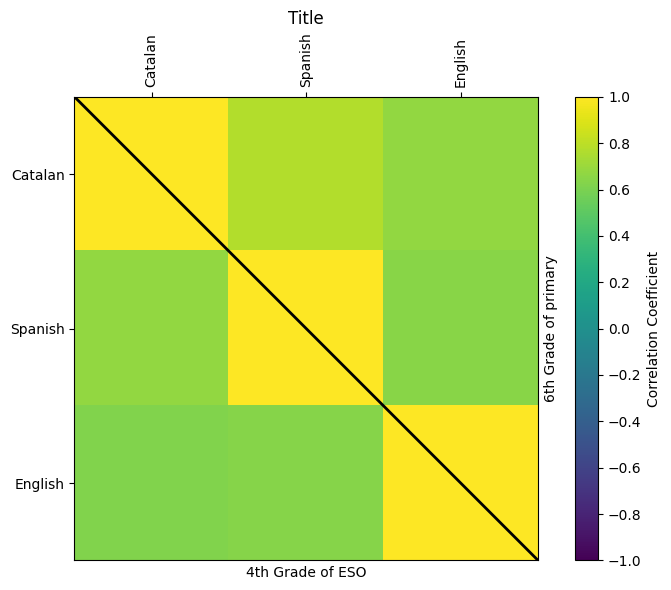

In [198]:
fields = ['PCAT','PCAST','PANG']
fields_labels = ['Catalan', 'Spanish', 'English']
title = 'Title'
plot_corr(primary_df, secondary_df, fields,fields,fields_labels, title)

Grades correlations between all three languages are positive, with a strongest correlation between catalan and spanish. The correlation for all trhee language pairs is higher at 6th grade of primary school than in 4th grade of secondary school. 

          PMAT      PMED
PMAT  1.000000  0.624324
PMED  0.624324  1.000000 
 
            PMAT     PCIEN
PMAT   1.000000  0.685661
PCIEN  0.685661  1.000000


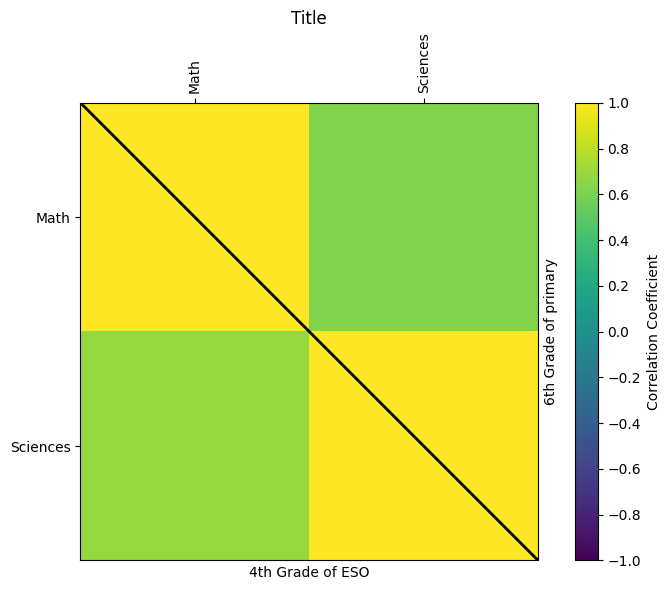

In [199]:
fields_1 = ['PMAT','PMED']
fields_2 = ['PMAT','PCIEN']
fields_labels = ['Math', 'Sciences']
title = 'Title'
plot_corr(primary_df, secondary_df, fields_1,fields_2,fields_labels, title)

There is a positive correlation between math and sciences which is moderately stronger at 4th grade of ESO.

              PCAT   PCAT_CL   PCAT_EE     PCAST  PCAST_CL  PCAST_EE  \
PCAT      1.000000  0.894642  0.862358  0.772289  0.672729  0.692116   
PCAT_CL   0.894642  1.000000  0.565453  0.678109  0.654862  0.534765   
PCAT_EE   0.862358  0.565453  1.000000  0.672211  0.530398  0.685963   
PCAST     0.772289  0.678109  0.672211  1.000000  0.839615  0.864672   
PCAST_CL  0.672729  0.654862  0.530398  0.839615  1.000000  0.545622   
PCAST_EE  0.692116  0.534765  0.685963  0.864672  0.545622  1.000000   
PMAT      0.639557  0.591988  0.536745  0.613168  0.562741  0.519165   
PMAT_NC   0.562120  0.532584  0.467586  0.535439  0.514355  0.440170   
PMAT_EFM  0.116729  0.151310  0.069062  0.087349  0.140457  0.031941   
PMAT_CR   0.543162  0.499744  0.455799  0.523956  0.469219  0.449192   
PANG      0.674851  0.592078  0.598153  0.645921  0.557462  0.589191   
PANG_CO   0.560566  0.512085  0.483335  0.528694  0.468199  0.476117   
PFRAN     0.594041  0.497237  0.536020  0.566651  0.463961  0.52

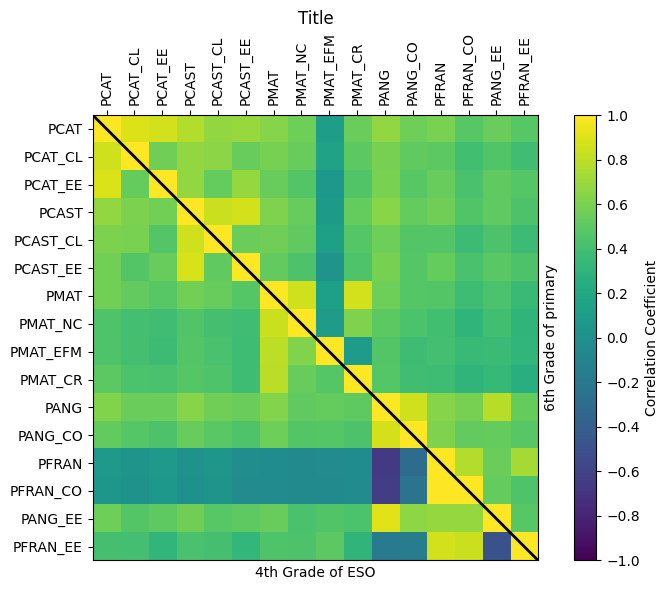

In [200]:
fields = ['PCAT', 'PCAT_CL', 'PCAT_EE', 'PCAST', 'PCAST_CL', 'PCAST_EE', 'PMAT', 'PMAT_NC', 'PMAT_EFM', 'PMAT_CR', 'PANG', 'PANG_CO', 'PFRAN', 'PFRAN_CO', 'PANG_EE', 'PFRAN_EE']
fields_labels = ['PCAT', 'PCAT_CL', 'PCAT_EE', 'PCAST', 'PCAST_CL', 'PCAST_EE', 'PMAT', 'PMAT_NC', 'PMAT_EFM', 'PMAT_CR', 'PANG', 'PANG_CO', 'PFRAN', 'PFRAN_CO', 'PANG_EE', 'PFRAN_EE']
title = 'Title'
plot_corr(primary_df, secondary_df, fields,fields,fields_labels,title)

Negative correlation beetween French and English. Almost no correlation between fr